**Importing Required Libraries**

In [1]:
from tqdm import tqdm
from google_play_scraper import app
import json

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter 

import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


**Let's choose some apps that fit the criteria from the Productivity category. We’ll use apptopia.com to select some of the top india apps.**

In [2]:
app_packages = [
  'com.jio.myjio',
  'share.sharekaro.pro',
  'com.speedifylink.fastest',
  'com.mventus.selfcare.activity',
  'com.document.reader.pdfreader.pdf',
  'com.downlood.sav.whmedia',
  'com.cambyte.okenscan',
  'com.digilocker.android',
  'com.nic.mparivahan',
  'com.taymay.pdf.scanner',
  'cn.wps.moffice_eng',
  'com.documentreader.documentapp.filereader',
  'com.lightning.safespeed',
  'com.cv.docscanner',
  'com.adobe.reader'
]

**Let's scrape the info for each app.**

In [3]:
# create an empty list to append the information
app_infos = []
for app_link in tqdm(app_packages):
    try:
        app_info = app(
            app_link,
            lang='en',  # defaults to 'en'
            country='in' # country code top level domain for india
        )
        # delete comments from the info app
        del app_info['comments']
    except:
        print("App not found(404).")
    # append app information into app_infos list
    app_infos.append(app_info) 

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:25<00:00,  1.70s/it]


**We got the info for all 15 apps. Let's write a helper function that prints JSON objects a bit better.**

In [4]:
def print_json(json_object):
    json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter())) 

# print_json(app_infos[0])


**Lets add a function which will add a title above each app icon.**

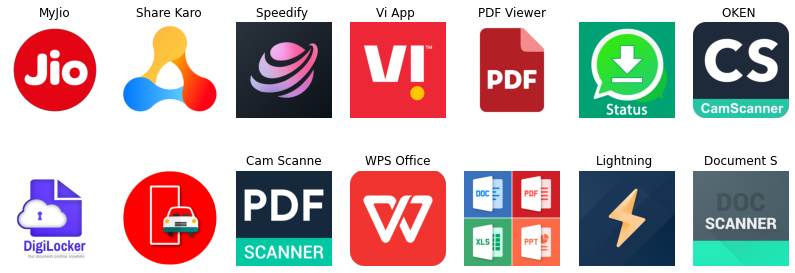

In [5]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:10]
    
# Lets have a look at the beautiful app icons
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'],'jpg')
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

**We'll store the app information for later by converting the JSON objects into a Pandas dataframe and saving the result into a CSV file.**

In [6]:
# converting json into pandas dataframes
app_infos_df = pd.DataFrame(app_infos)
# saving the result into csv file for later use.
app_infos_df.to_csv('apps_info.csv', index=None, header=True)